<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Lesson_10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product: Amazon Alexa**


## **Assignment Natural Language processsing - Sentiment Analysis**

### **Customer Review Classification using Random Forest**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews also provided(`amazon_alexa.tsv`)
---




### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a classification model.**



**Dataset Information:**

The dataset consists of customer reviews for Amazon Alexa products, including various features related to the product variation, customer rating, and feedback sentiment.

_Features/Columns_:
* rating: The customer rating of the product (scale of 1 to 5).
* date: The date when the review was posted.
* variation: The variation or type of Alexa product the review is for (e.g., "Charcoal Fabric", "Walnut Finish").
* verified_reviews: The actual review text written by the customer.
* feedback: The target variable indicating the sentiment of the review (1 for positive sentiment and 0 for negative sentiment).



---




In [60]:
# Amazon Alexa Customer Review Sentiment Analysis
# Objective: Classify reviews as positive or negative using Random Forest

# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, and various sklearn modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import moudules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


In [61]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# TODO: Load the dataset
# Hint: Use pandas to read the CSV file from your Google Drive

!unzip -o /content/archive.zip
file_path = '/content/amazon_alexa.tsv'

df = pd.read_csv(file_path, sep='\t')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/archive.zip
  inflating: amazon_alexa.tsv        


In [62]:
# --- Explore the dataset ---
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [63]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


/tmp/ipython-input-4232146721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='feedback', data=df, palette='viridis')


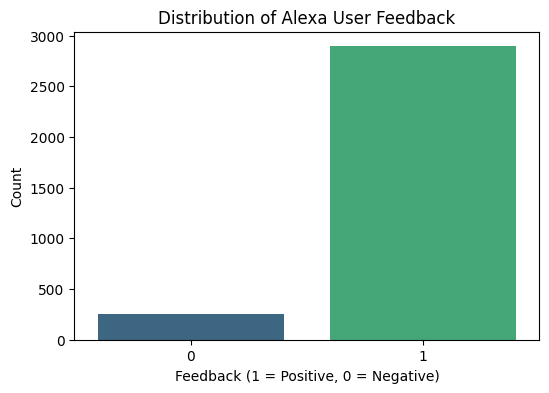

In [64]:
# Data Visualization and Clean Up
# TODO: Visualize the distribution of feedback
# Hint: Use seaborn's countplot function

df['verified_reviews'] = df['verified_reviews'].fillna('')

print(df.isnull().sum())


plt.figure(figsize=(6,4))
sns.countplot(x='feedback', data=df, palette='viridis')

plt.title('Distribution of Alexa User Feedback')
plt.xlabel('Feedback (1 = Positive, 0 = Negative)')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2430800237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variation', y='rating', data=df, palette='viridis')


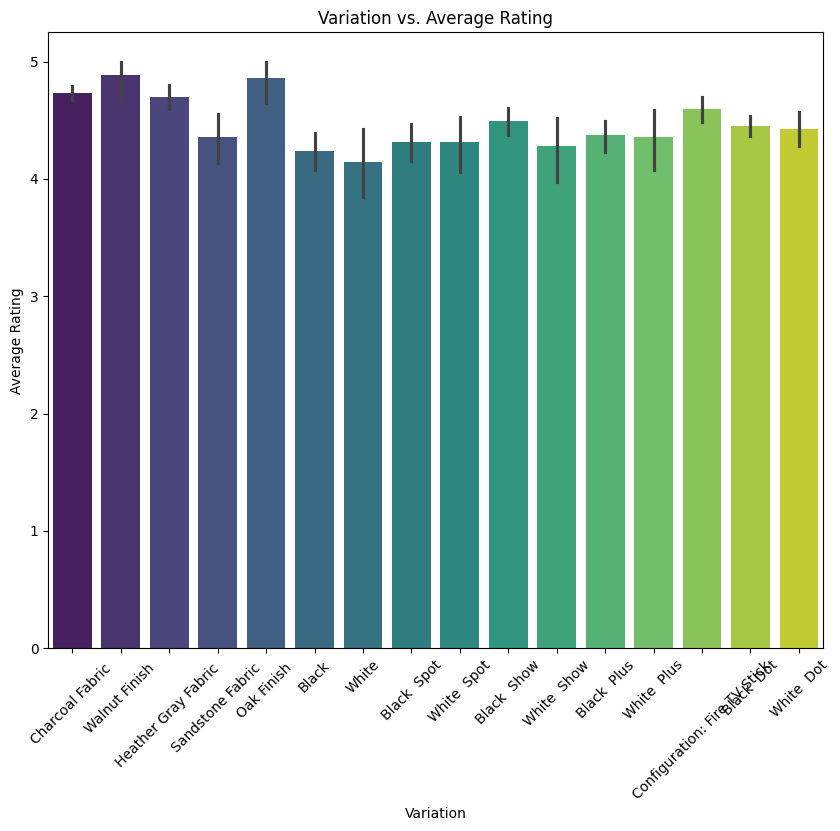

In [65]:
# TODO: Visualize the relationship between variations and ratings
# Hint: Use seaborn's barplot function
plt.figure(figsize=(10,8))
sns.barplot(x='variation', y='rating', data=df, palette='viridis')
plt.title('Variation vs. Average Rating')
plt.xlabel('Variation')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [66]:
# TODO: Drop irrelevant columns
# Hint: Use the drop() method to remove 'date' and 'rating' columns

df.drop(['date', 'rating'], axis=1, inplace=True)
print(df.head())


          variation                                   verified_reviews  \
0  Charcoal Fabric                                       Love my Echo!   
1  Charcoal Fabric                                           Loved it!   
2    Walnut Finish   Sometimes while playing a game, you can answer...   
3  Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...   
4  Charcoal Fabric                                               Music   

   feedback  
0         1  
1         1  
2         1  
3         1  
4         1  


In [103]:
# One-Hot Encoding
# TODO: Perform one-hot encoding on the 'variation' column
# Hint: Use pandas get_dummies() function

df['variation'] = df['variation'].str.strip()
df['variation'] = df['variation'].str.replace(' ', '_')
df_encoded = pd.get_dummies(df, columns=['variation'], drop_first=False)
df_encoded['feedback'] = df_encoded['feedback'].astype(int)

print(df_encoded.shape)
print(df_encoded.head())


(3150, 18)
                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

   variation_Black  variation_Black__Dot  variation_Black__Plus  \
0            False                 False                  False   
1            False                 False                  False   
2            False                 False                  False   
3            False                 False                  False   
4            False                 False                  False   

   variation_Black__Show  variation_Black__Spot  variation_Charcoal_Fabric  \
0                  False                  False                       True   
1                  False         

In [104]:
# Tokenization (Count Vectorizer)
# TODO: Tokenize the 'verified_reviews' column
# Hint: Use CountVectorizer from sklearn.feature_extraction.text
vectorizer = CountVectorizer(stop_words='english')
review_tokens = vectorizer.fit_transform(df_encoded['verified_reviews'])
print(review_tokens)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 33005 stored elements and shape (3150, 3784)>
  Coords	Values
  (0, 2029)	1
  (0, 1095)	1
  (1, 2030)	1
  (2, 2471)	1
  (2, 1413)	1
  (2, 236)	1
  (2, 2623)	1
  (2, 796)	1
  (2, 190)	1
  (2, 2885)	1
  (2, 1473)	1
  (2, 3752)	1
  (2, 239)	1
  (2, 1955)	1
  (2, 79)	1
  (2, 3497)	1
  (2, 1954)	1
  (2, 337)	1
  (2, 1616)	1
  (3, 2471)	1
  (3, 1955)	1
  (3, 1954)	1
  (3, 2023)	1
  (3, 1395)	1
  (3, 3386)	1
  :	:
  (3148, 3115)	1
  (3148, 2183)	1
  (3148, 3576)	1
  (3148, 1495)	1
  (3148, 2062)	1
  (3148, 810)	1
  (3148, 3037)	1
  (3148, 683)	1
  (3148, 3292)	1
  (3148, 3137)	1
  (3148, 2618)	2
  (3148, 1046)	1
  (3148, 1388)	1
  (3148, 1052)	2
  (3148, 1624)	1
  (3148, 1865)	1
  (3148, 1813)	1
  (3148, 317)	1
  (3148, 1905)	1
  (3148, 3215)	1
  (3148, 709)	1
  (3148, 2131)	1
  (3148, 1623)	1
  (3148, 457)	1
  (3149, 1467)	1


In [105]:
# TODO: Combine tokenized reviews with the main dataframe
# Hint: Use pd.concat() to join the dataframes

review_df = pd.DataFrame(review_tokens.toarray(), columns=vectorizer.get_feature_names_out())
df_final = pd.concat([df_encoded.drop(['verified_reviews'], axis=1).reset_index(drop=True),
                      review_df.reset_index(drop=True)], axis=1)

print(df_final.head())



   feedback  variation_Black  variation_Black__Dot  variation_Black__Plus  \
0         1            False                 False                  False   
1         1            False                 False                  False   
2         1            False                 False                  False   
3         1            False                 False                  False   
4         1            False                 False                  False   

   variation_Black__Show  variation_Black__Spot  variation_Charcoal_Fabric  \
0                  False                  False                       True   
1                  False                  False                       True   
2                  False                  False                      False   
3                  False                  False                       True   
4                  False                  False                       True   

   variation_Configuration:_Fire_TV_Stick  variation_Heather_Gray_Fa

In [111]:
if 'feedback' in review_df.columns:
    review_df = review_df.drop(['feedback'], axis=1)

df_final = pd.concat([
    df_encoded.drop(['verified_reviews'], axis=1).reset_index(drop=True),
    review_df.reset_index(drop=True)
], axis=1)

print(df_final['feedback'].shape)


(3150,)


In [112]:
# Prepare data for modeling
# TODO: Split the data into features (X) and target (y)
# Hint: The target variable is 'feedback'
X = df_final.drop('feedback', axis=1)
y = df_final['feedback']




In [113]:
# TODO: Split the data into training and testing sets
# Hint: Use train_test_split from sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (2520, 3799)
X_test shape: (630, 3799)
y_train shape: (2520,)
y_test shape: (630,)


In [117]:
# Train the Random Forest model
# TODO: Create and train the Random Forest model
# Hint: Use RandomForestClassifier from sklearn.ensemble

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
# Evaluate the model
# TODO: Generate predictions and create confusion matrix
# Hint: Use the predict() method and confusion_matrix from sklearn.metrics
y_pred = rf_model.predict(X_test)

print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)



y_test shape: (630,)
y_pred shape: (630,)


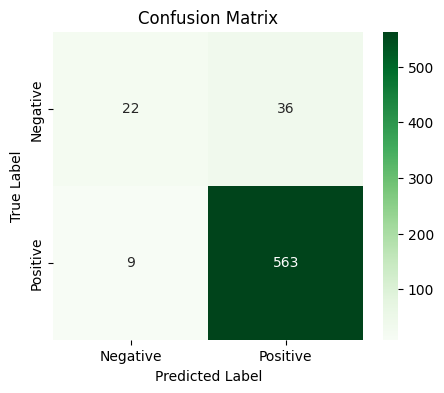

In [123]:
# TODO: Plot confusion matrix
# Hint: Use seaborn's heatmap function

cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [124]:
# TODO: Print classification report
# Hint: Use classification_report from sklearn.metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.49        58
           1       0.94      0.98      0.96       572

    accuracy                           0.93       630
   macro avg       0.82      0.68      0.73       630
weighted avg       0.92      0.93      0.92       630



In [129]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

# Create and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:,1]  # Probability for class 1 (Positive)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")


Logistic Regression Accuracy: 0.9270
Logistic Regression ROC-AUC: 0.9361


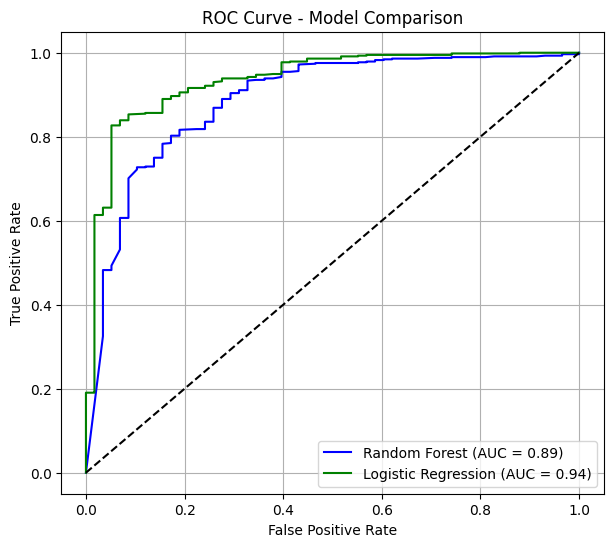

In [130]:
# Plot ROC Curve for Both Models
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Random Forest probabilities
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob_rf):.2f})', color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_lr):.2f})', color='green')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.title('ROC Curve - Model Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


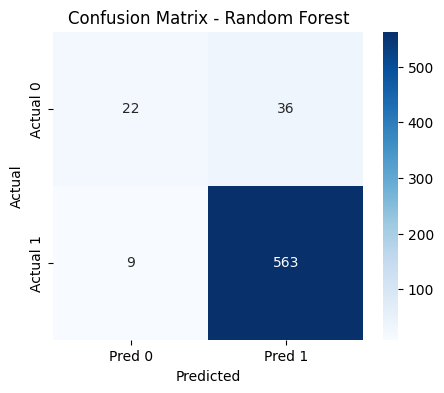

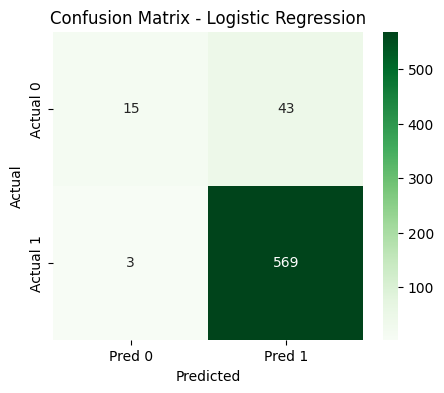

In [133]:
# Update Confusion Matrix & Feature Importance
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


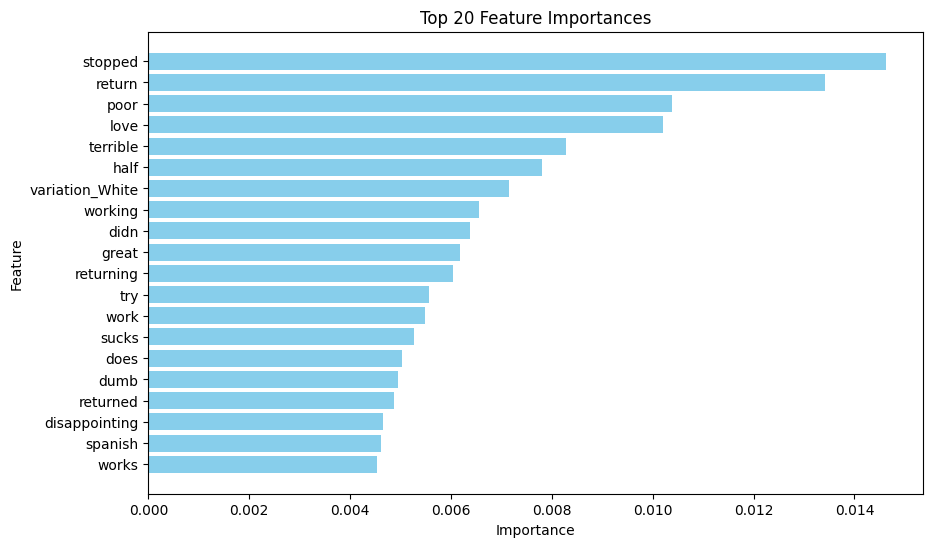

In [132]:
# Feature Importance
# TODO: Visualize feature importance
# Hint: Access feature_importances_ attribute of the trained model

importances = rf_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort value by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the to 20 features
top_features = feature_importance_df.head(20)

# Visualization
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  #  The most importance on the top
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [127]:
# TODO: Make predictions on new data
# Hint: Create a function that takes a new review text, preprocesses it,
# and uses the trained model to predict its sentiment

def predict_sentiment(new_review):
    """
    Predicts the sentiment (positive or negative) of a new review text.
    """
    # ✅ 1. Ensure the input is in list format
    if isinstance(new_review, str):
        new_review = [new_review]

    # ✅ 2. Convert the review into the same feature space as training data
    new_review_vectorized = vectorizer.transform(new_review)
    new_review_df = pd.DataFrame(new_review_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

    # ✅ 3. Build a DataFrame for product variations (since training data had them)
    # Assume no variation info at prediction time → fill with False
    variation_cols = [col for col in X_train.columns if col.startswith('variation_')]
    variation_df = pd.DataFrame([[False] * len(variation_cols)], columns=variation_cols)

    # ✅ 4. Combine variation features and text features
    new_data_final = pd.concat([variation_df, new_review_df], axis=1).reindex(columns=X_train.columns, fill_value=0)

    # ✅ 5. Predict sentiment using the trained Random Forest model
    pred = rf_model.predict(new_data_final)

    # ✅ 6. Output the result
    sentiment = "Positive" if pred[0] == 1 else "Negative"
    return sentiment


In [128]:
# Example usage of your prediction function:
# new_review = "I love my Alexa device! It's so helpful."
# predicted_sentiment = predict_sentiment(new_review)
# print(f"The sentiment of the new review is: {predicted_sentiment}")
# Example usage of your prediction function
new_review = "I love my Alexa device! It's so helpful."
predicted_sentiment = predict_sentiment(new_review)
print(f"The sentiment of the new review is: {predicted_sentiment}")

# Try another example
new_review_2 = "It stopped working after two days. Very disappointed."
predicted_sentiment_2 = predict_sentiment(new_review_2)
print(f"The sentiment of the new review is: {predicted_sentiment_2}")


The sentiment of the new review is: Positive
The sentiment of the new review is: Negative
